# Linear Regression for Cycle Power Plant Dataset

### Sitao Min

### 1. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plan

### (a) Download the Combined Cycle Power Plantdata from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.

### (b) Exploring the data:

In [6]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [7]:
df2 = pd.read_excel('Folds5x2_pp.xlsx')
df2.shape

(9568, 5)

In [8]:
df2.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [9]:
df2.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### (i) dataset description

1. There are 9567 rows and 5 columns in dataset.

2. Each row means each sample of the data.
   
   First 4 columns means feature of samples, represent Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V).
   
   Last columns means target value of samples, represent hourly electrical energy output (EP) of the plant.

### (ii) Make pairwise scatterplots of all the varianbles in the data set

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

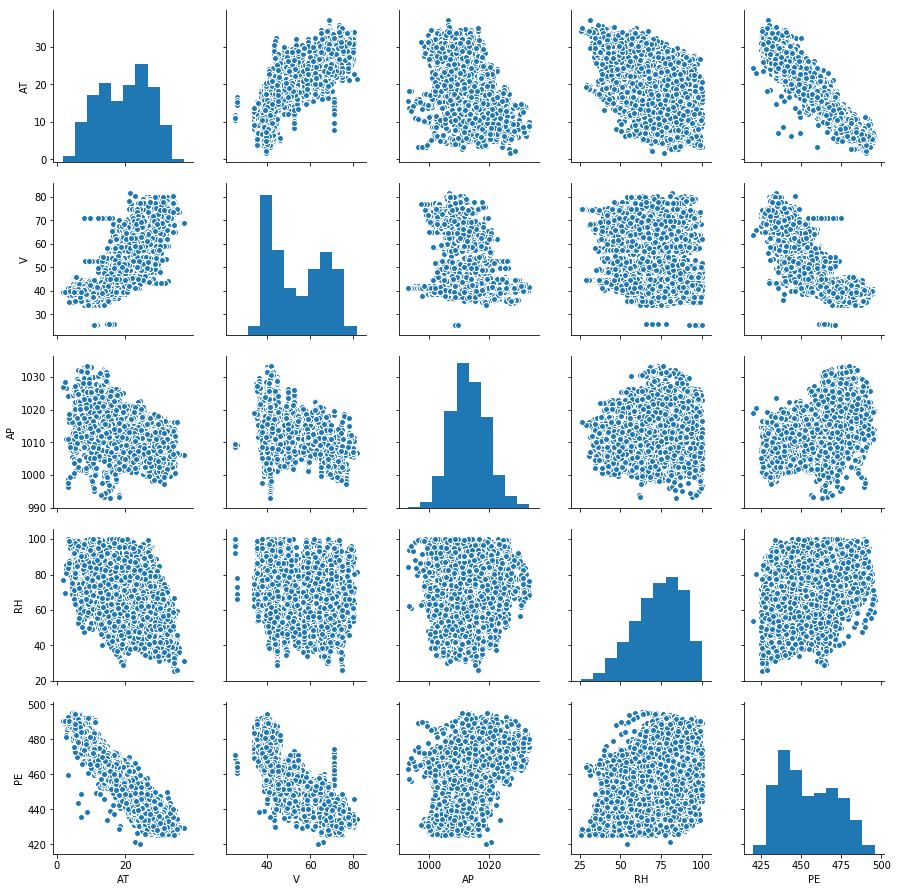

In [11]:
g = sns.pairplot(df2,x_vars=['AT','V','AP','RH','PE'], y_vars=['AT','V','AP','RH','PE'])
plt.show()

Through the plot, we can find that the target value(energy output) seems has linear relationship with AT(Tempurature) and V(Vacuum), also V and AT has linear relationship.

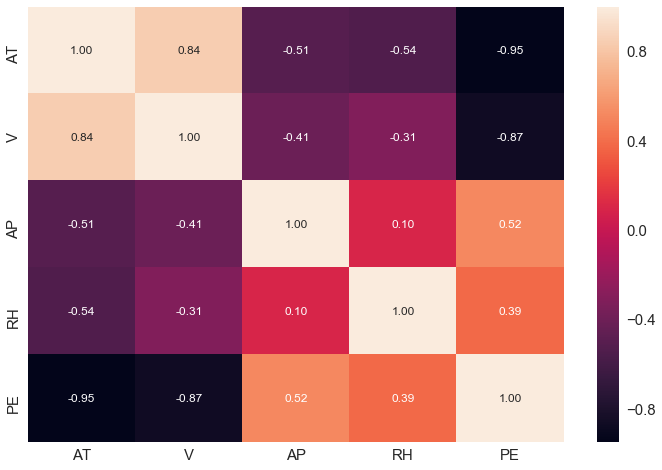

In [12]:
import numpy as np
cols = ['AT','V','AP','RH','PE']
cor_matrix = np.corrcoef(df2[cols].values.T)
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
hm = sns.heatmap(cor_matrix, cbar = True, annot = True, fmt = '.2f', annot_kws = {'size':12},
                 yticklabels = cols,
                 xticklabels = cols)
plt.show()

Through correlated matrix we can easy see that, AT and V has strong positive correlation, AT and  PE, V and PE has strong negitive correlation

### (iii) Mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset

In [13]:
df2_des = df2.describe()
df2_des.loc['range'] = df2_des.loc['max'] - df2_des.loc['min']
df2_des.loc['interquartile'] = df2_des.loc['75%'] - df2_des.loc['25%']
df2_des

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
interquartile,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Fit a simple linear regression model to predict the response for single predictor

******************************************************************************
Regression Result: AT ~ PE
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:09:38   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

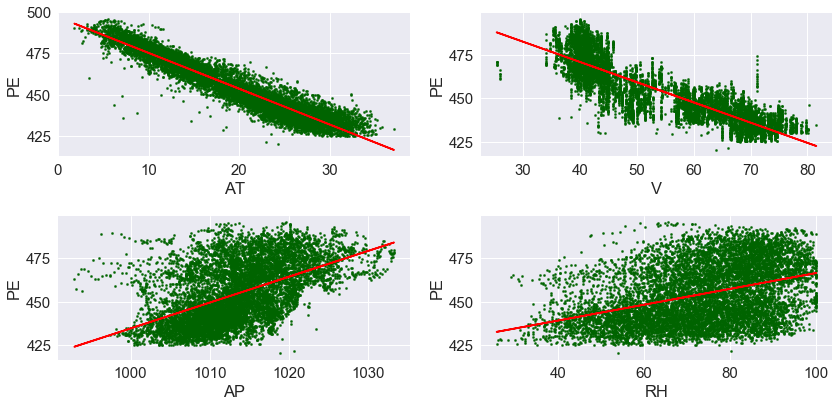

In [14]:
from sklearn.linear_model import LinearRegression
from scipy import stats
fig, axes = plt.subplots(2,2,figsize=(12,6))
coefs = np.zeros(4)
for i in range(len(df2.columns)-1):
    
    X = df2.iloc[:,i].values
    y = df2['PE'].values
    li_reg = smf.ols(formula='PE ~ %s'%df2.columns[i], data=df2)
    
    results1 = li_reg.fit()
    print("******************************************************************************")
    print("Regression Result: %s ~ PE"%df2.columns[i])
    print(results1.summary())
    
    slope = results1.params[1]
    intercept =results1.params[0]
    
    coefs[i] = results1.params[1]
    axes[int(i/2),i%2].scatter(X, y, c = 'darkgreen', s = 5, marker = 'o')
    axes[int(i/2),i%2].plot(X, intercept + slope*X, color = 'red')
    axes[int(i/2),i%2].set_xlabel("%s"%(df2.columns[i]))
    axes[int(i/2),i%2].set_ylabel("PE")

plt.tight_layout()
plt.show()

### Using RANSAC algorithm finding outliers of data

/Users/apple/venv/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


predictor:AT
Estimated coefficients: linear regression, RANSAC:
[-2.17131996] [-2.16648201]
predictor:V
Estimated coefficients: linear regression, RANSAC:
[-1.16813513] [-1.05647863]
predictor:AP
Estimated coefficients: linear regression, RANSAC:
[1.48987167] [2.47012157]
predictor:RH
Estimated coefficients: linear regression, RANSAC:
[0.4556501] [0.19715524]


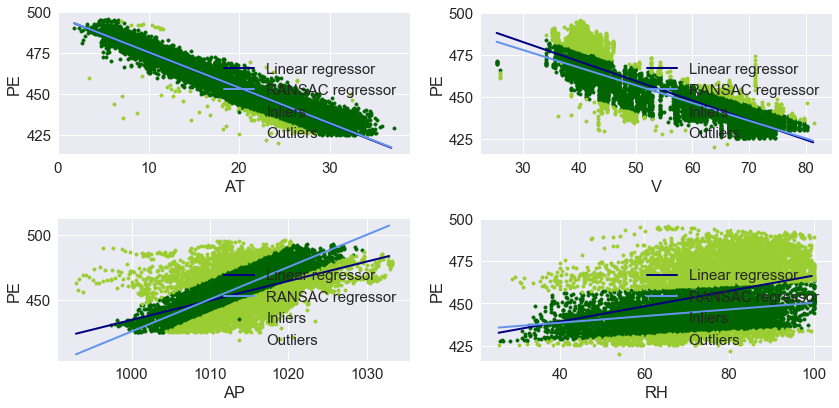

In [15]:
from sklearn import linear_model
fig, axes = plt.subplots(2,2,figsize=(12,6))

for i in range(len(df2.columns)-1):
    
    X = df2.iloc[:,i].values.reshape(-1,1)
    y = df2['PE'].values

    # Fit line using all data
    lr = linear_model.LinearRegression()
    lr.fit(X, y)
    
    # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor()
    ransac.fit(X, y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)

    # Predict data of estimated models
    line_X = np.arange(X.min(), X.max())[:, np.newaxis]
    line_y = lr.predict(line_X)
    line_y_ransac = ransac.predict(line_X)

    # Compare estimated coefficients
    print('============================================================')
    print('predictor:%s'%df2.columns[i])
    print("Estimated coefficients: linear regression, RANSAC:")
    print(lr.coef_, ransac.estimator_.coef_)

    lw = 2
    axes[int(i/2),i%2].scatter(X[inlier_mask], y[inlier_mask], color='darkgreen', marker='.',
                               label='Inliers')
    axes[int(i/2),i%2].scatter(X[outlier_mask], y[outlier_mask], color='yellowgreen', marker='.',
                               label='Outliers')

    axes[int(i/2),i%2].plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
    axes[int(i/2),i%2].plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
                             label='RANSAC regressor')
    axes[int(i/2),i%2].legend(loc='lower right')
    axes[int(i/2),i%2].set_xlabel("%s"%(df2.columns[i]))
    axes[int(i/2),i%2].set_ylabel("PE")
    
plt.tight_layout()
plt.show()

**As we can see above, we want to drop the outlier of the data which is shown in yellowgreen.**

### (d) Fit multiple regression model to predict the response using all of the predictors.

In [16]:
mutli_reg = smf.ols(formula='PE ~ AT + V + AP +RH ',data=df2)
    
results2 = mutli_reg.fit()

print("Regression Result:")
print(results2.summary())

Regression Result:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:14:19   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749 

### (e) Compare to your results between single and multiple regression

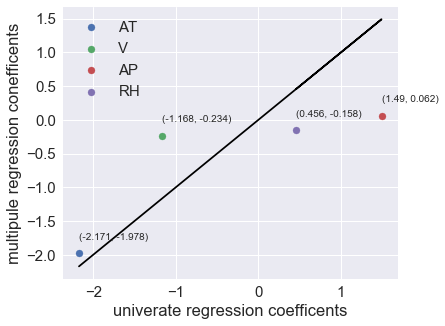

In [17]:
Y = [results2.params[1],results2.params[2],results2.params[3],results2.params[4]]
X = coefs
plt.figure(figsize = (6,5))
for i in range(0,4):
    plt.scatter(X[i],Y[i],label = '%s'%df2.columns[i])

for x, y in zip(X, Y):
    text = '(' + str(round(x,3)) + ', ' + str(round(y,3)) + ')'
    plt.text(x, y+0.2, text, fontsize = 10)
plt.plot(X,X,c = 'black')
plt.xlabel('univerate regression coefficents')
plt.ylabel('multipule regression conefficents')
plt.legend()
plt.show()

### (f) Evidence of nonlinear association between any of the predictors and the response

#### (i) AT

AT Nolinear Regression Result:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:16:34   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281

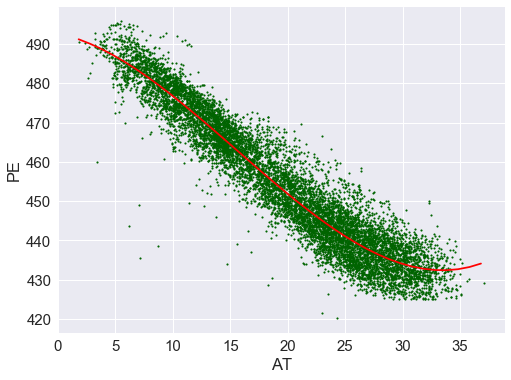

In [18]:
df_AT = df2['AT'].to_frame()
df_AT['AT2'] = df_AT['AT']**2
df_AT['AT3'] = df_AT['AT']**3
df_AT['PE'] = df2['PE']

nonli_reg_AT = smf.ols(formula='PE ~ AT + AT2 + AT3',data=df_AT)
results_AT = nonli_reg_AT.fit()
print("AT Nolinear Regression Result:")
print(results_AT.summary())

X_AT = df_AT['AT'].values
y_AT = df_AT['PE'].values
X_line = np.arange(X_AT.min(),X_AT.max())
plt.figure(figsize = (8,6))
plt.scatter(X_AT,y_AT, c='darkgreen', s = 3)
plt.plot(X_line, results_AT.params[0] + results_AT.params[1]*X_line + results_AT.params[2]*(X_line**2) 
         + results_AT.params[3]*(X_line**3), c = 'red')
plt.ylabel('PE')
plt.xlabel('AT')
plt.show()

#### (ii) V

V Nolinear Regression Result:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:16:58   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468 

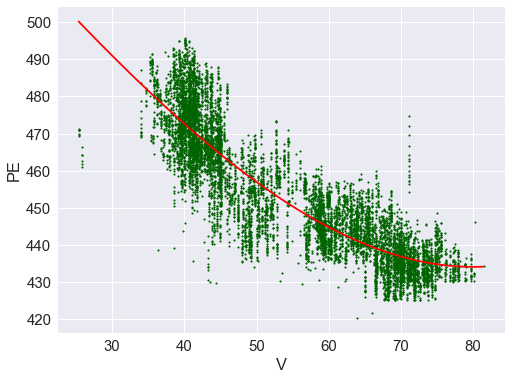

In [20]:
df_V = df2['V'].to_frame()
df_V['V2'] = df_V['V']**2
df_V['V3'] = df_V['V']**3
df_V['PE'] = df2['PE']

nonli_reg_V = smf.ols(formula='PE ~ V + V2 + V3',data=df_V)
results_V = nonli_reg_V.fit()
print("V Nolinear Regression Result:")
print(results_V.summary())

X_V = df_V['V'].values
y_V = df_V['PE'].values
X_line = np.arange(X_V.min(),X_V.max())
plt.figure(figsize = (8,6))
plt.scatter(X_V,y_V, c='darkgreen', s = 3)
plt.plot(X_line, results_V.params[0] + results_V.params[1]*X_line + results_V.params[2]*(X_line**2) 
         + results_V.params[3]*(X_line**3), c = 'red')
plt.ylabel('PE')
plt.xlabel('V')
plt.show()

#### (iii) AP

AP Nolinear Regression Result:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:17:22   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747

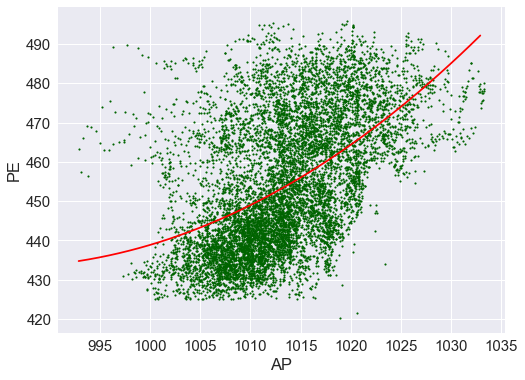

In [21]:
df_ap = df2['AP'].to_frame()
df_ap['AP2'] = df_ap['AP']**2
df_ap['AP3'] = df_ap['AP']**3
df_ap['PE'] = df2['PE']

nonli_reg_ap = smf.ols(formula='PE ~ AP + AP2 + AP3',data=df_ap)
results_ap = nonli_reg_ap.fit()
print("AP Nolinear Regression Result:")
print(results_ap.summary())

X_ap = df_ap['AP'].values
y_ap = df_ap['PE'].values
X_line = np.arange(X_ap.min(),X_ap.max())
plt.figure(figsize = (8,6))
plt.scatter(X_ap,y_ap, c='darkgreen', s = 3)
plt.plot(X_line, results_ap.params[0] + results_ap.params[1]*X_line + results_ap.params[2]*(X_line**2) 
         + results_ap.params[3]*(X_line**3), c = 'red')
plt.ylabel('PE')
plt.xlabel('AP')
plt.show()

#### (iv) RH 

RH Nolinear Regression Result:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:17:44   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135

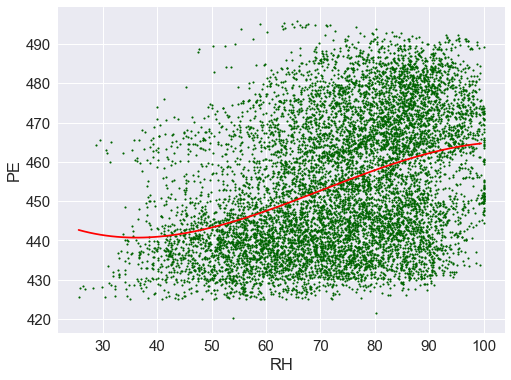

In [22]:
df_RH = df2['RH'].to_frame()
df_RH['RH2'] = df_RH['RH']**2
df_RH['RH3'] = df_RH['RH']**3
df_RH['PE'] = df2['PE']

nonli_reg_RH = smf.ols(formula='PE ~ RH + RH2 + RH3',data=df_RH)
results_RH = nonli_reg_RH.fit()
print("RH Nolinear Regression Result:")
print(results_RH.summary())

X_RH = df_RH['RH'].values
y_RH = df_RH['PE'].values
X_line = np.arange(X_RH.min(),X_RH.max())
plt.figure(figsize = (8,6))
plt.scatter(X_RH,y_RH, c='darkgreen', s = 3)
plt.plot(X_line, results_RH.params[0] + results_RH.params[1]*X_line + results_RH.params[2]*(X_line**2) 
         + results_RH.params[3]*(X_line**3), c = 'red')
plt.ylabel('PE')
plt.xlabel('RH')
plt.show()

### (g) Evidence of association of interactions of predictors with the response? 
run a full linear regression model with all pairwise interaction terms and state whether
any interaction terms are statistically significant.

In [23]:
df_inter = df2['AT'].to_frame()
df_inter['V'] = df2['V']
df_inter['AP'] = df2['AP']
df_inter['RH'] = df2['RH']
df_inter['AT_V'] = df2['AT']*df2['V']
df_inter['AT_AP'] = df2['AT']*df2['AP']
df_inter['AT_RH'] = df2['AT']*df2['RH']
df_inter['V_AP'] = df2['V']*df2['AP']
df_inter['V_RH'] = df2['V']*df2['RH']
df_inter['AP_RH'] = df2['AP']*df2['RH']
df_inter['PE'] = df2['PE']

reg_inter = smf.ols(formula='PE ~ AT + V + AP + RH + AT_V + AT_AP + AT_RH + V_AP + V_RH + AP_RH',data=df_inter)
results_inter = reg_inter.fit()
print("linear Regression with interaction Result:")
print(results_inter.summary())

linear Regression with interaction Result:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:18:54   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

#### There are significant evidence that interaction between AT and V, AT and RH, V and AP, AP and RH. 

### (h) Improve model using possible interaction terms or nonlinear associations between the predictors and response( Backward selection to select significant features)

### Train regression model

In [24]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X = df2.iloc[:,0:4].values
y = df2['PE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7 ,random_state=1)


df_lin_train = pd.DataFrame(X_train,columns = ['AT','V','AP','RH'])
df_lin_train['PE'] = pd.Series(y_train)
df_lin_test = pd.DataFrame(X_test,columns = ['AT','V','AP','RH'])
df_lin_test['PE'] = pd.Series(y_test)

# train linear model
linreg = smf.ols(formula='PE ~ AT + V + AP + RH',data=df_lin_train)
result_lin = linreg.fit()

# make predictions on the testing set
y_pred = result_lin.predict(df_lin_test)

print(result_lin.summary())
print('MSE:')
print(metrics.mean_squared_error(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.167e+04
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:20:13   Log-Likelihood:                -19660.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    458.3988     11.562     39.649      0.0

/Users/apple/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Quardratic nolinear regression with all interaction terms

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

df_qra_train = pd.DataFrame(X_train_, columns = ['intercept','AT','V','AP','RH','AT_2','AT_V','AT_AP',
                                           'AT_RH','V_2','V_AP','V_RH','AP_2','AP_RH','RH_2'])
df_qra_train = df_qra_train.drop('intercept', axis = 1)
df_qra_train['PE'] = pd.Series(y_train)

df_qra_test = pd.DataFrame(X_test_,columns = ['intercept','AT','V','AP','RH','AT_2','AT_V','AT_AP',
                                                  'AT_RH','V_2','V_AP','V_RH','AP_2','AP_RH','RH_2'])
df_qra_test = df_qra_test.drop('intercept', axis = 1)
df_qra_test['PE'] = pd.Series(y_test)

reg_qra = smf.ols(formula='PE ~ AT + V + AP + RH + AT_2 + AT_V + AT_AP + AT_RH \
                           + V_2 + V_AP + V_RH + AP_2 + AP_RH + RH_2',data=df_qra_train)
results_qra = reg_qra.fit()
print("linear Regression with interaction Result:")
print(results_qra.summary())

linear Regression with interaction Result:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7181.
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:20:36   Log-Likelihood:                -19192.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6682   BIC:                         3.852e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

**According to result, we can see that AT - AP p-value 0.731 is largest, so we should drop this term**

In [26]:
df_qra2_train = df_qra_train.drop('AT_AP',axis = 1)
reg_qra2 = smf.ols(formula='PE ~ AT + V + AP + RH + AT_2 + AT_V + AT_RH \
                           + V_2 + V_AP + V_RH + AP_2 + AP_RH + RH_2',data=df_qra2_train)
results_qra2 = reg_qra2.fit()
print("linear Regression with interaction Result2(after drop V_RH):")
print(results_qra2.summary())

linear Regression with interaction Result2(after drop V_RH):
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7735.
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:20:58   Log-Likelihood:                -19192.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6683   BIC:                         3.851e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

**According to result, we can see that V - RH p-value 0.465 is largest, so we should drop this term**

In [28]:
df_qra3_train = df_qra2_train.drop('V_RH',axis = 1)
reg_qra3 = smf.ols(formula='PE ~ AT + V + AP + RH + AT_2 + AT_V + AT_RH \
                           + V_2 + V_AP + AP_2 + AP_RH + RH_2',data=df_qra3_train)
results_qra3 = reg_qra3.fit()
print("linear Regression with interaction Result3(after drop V_RH, AT_AP):")
print(results_qra3.summary())

linear Regression with interaction Result3(after drop V_RH, AT_AP):
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     8380.
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:21:19   Log-Likelihood:                -19192.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6684   BIC:                         3.850e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

**According to result, we can see that V_2 p-value 0.388 is largest, so we should drop this term**

In [29]:
df_qra4_train = df_qra3_train.drop('V_2',axis = 1)
reg_qra4 = smf.ols(formula='PE ~ AT + V + AP + RH + AT_2 + AT_V + AT_RH \
                           + V_AP + AP_2 + AP_RH + RH_2',data=df_qra4_train)
results_qra4 = reg_qra4.fit()
print("linear Regression with interaction Result4(after drop V_RH, AT_AP, V_2):")
print(results_qra4.summary())

linear Regression with interaction Result4(after drop V_RH, AT_AP, V_2):
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9142.
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:21:45   Log-Likelihood:                -19193.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6685   BIC:                         3.849e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

**Now all p-values are below 0.05, so we can use this model as final model and train it**

In [30]:
y_pred_nolinear = results_qra4.predict(df_qra_test)

print('Nolinear and interaction model MSE:')
print(metrics.mean_squared_error(y_test, y_pred_nolinear))

Nolinear and interaction model MSE:
18.232225767459962


In [31]:
lireg_MSE = metrics.mean_squared_error(y_test, y_pred)
qra_MSE = metrics.mean_squared_error(y_test, y_pred_nolinear)

print('Linear model with no iteraction MSE:')
print(metrics.mean_squared_error(y_test, y_pred))
print('Quadratic and interaction model MSE:')
print(metrics.mean_squared_error(y_test, y_pred_nolinear))
print('Imporvement:%.1f percent' % (100.0*(lireg_MSE- qra_MSE)/lireg_MSE))

Linear model with no iteraction MSE:
20.7774781068848
Quadratic and interaction model MSE:
18.232225767459962
Imporvement:12.3 percent


### (i) KNN Regression:

optimal k: 5.000000
best train error: 0.000000
best test error: 15.704821


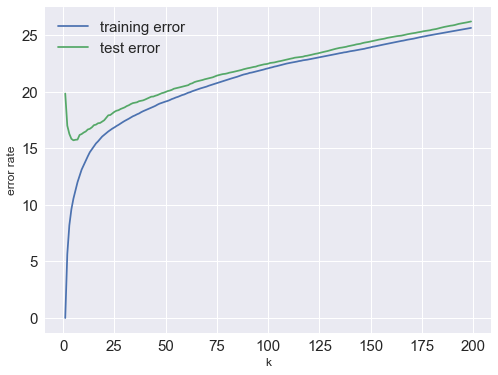

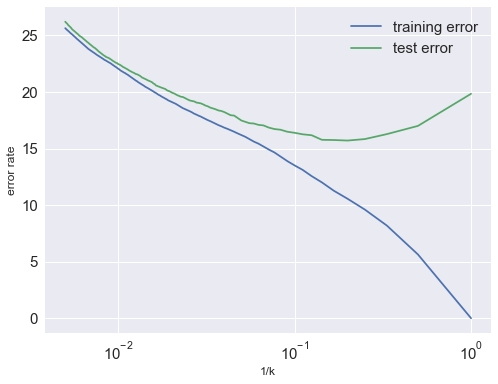

In [32]:
from sklearn.neighbors import KNeighborsRegressor
def kNNreg_train(X_train, y_train, X_test, y_test, k_set):
    
    train_error = np.empty(len(k_set))
    test_error = np.empty(len(k_set))

    for index,k in enumerate(k_set):

        knn = KNeighborsRegressor(n_neighbors=k)
        # fitting the model
        knn.fit(X_train, y_train)
        # predict the response
        y_train_pred = knn.predict(X_train)
        y_pred_knn = knn.predict(X_test)
        # evaluate accuracy
        train_error[index] = metrics.mean_squared_error(y_train,y_train_pred)
        test_error[index] = metrics.mean_squared_error(y_test,y_pred_knn) 
    
    print('optimal k: %f' % k_set[test_error.argmin()])
    print('best train error: %f'% train_error.min())
    print('best test error: %f'% test_error.min())
    return train_error,test_error

k_set = np.arange(1,200,1)
train_error,test_error = kNNreg_train(X_train, y_train, X_test,y_test,k_set)
KNNreg_MSE = test_error.min()
plt.figure(figsize=(8,6))
plt.plot(k_set,train_error,label = 'training error')
plt.plot(k_set,test_error, label = 'test error')
plt.xlabel('k',fontsize = 12)
plt.ylabel('error rate', fontsize = 12)
plt.legend(fontsize=15)
plt.show()

k_inverse = 1/k_set
plt.figure(figsize=(8,6))
plt.semilogx(k_inverse, train_error, label = 'training error')
plt.semilogx(k_inverse, test_error, label = 'test error')
plt.xlabel('1/k', fontsize = 12)
plt.ylabel('error rate', fontsize = 12)
plt.legend(fontsize=15)
plt.show()

### Optimal K is 5. Best Test MSE = 15.7

### Compare the results of KNN Regression with linear regression and provide your analysis.

In [33]:
print('Perfermance of model:(MSE)')
print('simple linear regression: %f'%lireg_MSE)
print('quardratic regression with interaction: %f'%qra_MSE)
print('KNN regression: %f'%KNNreg_MSE)

Perfermance of model:(MSE)
simple linear regression: 20.777478
quardratic regression with interaction: 18.232226
KNN regression: 15.704821
